## Exploratory Data Analysis (EDA) in Python

In this notebook, we perform **Exploratory Data Analysis (EDA)** on a wine quality dataset using Python.

EDA is the process of:
- Understanding the structure of the data,
- Detecting patterns and relationships,
- Finding missing values, outliers, and anomalies,
- Preparing the data for further modeling (e.g., machine learning).

We will use the following Python libraries:
- `pandas` for data loading and manipulation,
- `numpy` for numerical operations,
- `matplotlib` and `seaborn` for data visualization.


### Step 1: Importing Required Libraries

In [5]:

import pandas as pd          # Work with tabular data (DataFrame)
import numpy as np           # Numerical operations, arrays, math
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns        # Statistical plots built on top of matplotlib

import warnings as wr        # Handle warning messages
wr.filterwarnings('ignore')  # Hide non-critical warnings to keep output clean



### Why do we import these libraries?

- `pandas` (`pd`): Provides the `DataFrame` object, which is the main structure for data analysis in Python.
- `numpy` (`np`): Supports fast numerical computations and array operations.
- `matplotlib.pyplot` (`plt`): Low-level plotting library, used to create basic figures.
- `seaborn` (`sns`): High-level interface for attractive and informative statistical graphics.
- `warnings`: We suppress minor warnings so that the notebook output remains clean and easy to read.


## Step 2 — Loading the Dataset

In this step, we load the Wine Quality dataset into a pandas DataFrame.

We use the `read_csv()` function from pandas, which reads a CSV file and converts it into a tabular DataFrame. After loading, we print the first few rows to understand the structure of the data.


In [7]:
df = pd.read_csv('WineQT.csv')  # Load dataset into a DataFrame
df.head()  # Display the first few rows of the DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### What does `df.head()` show?

- Only the **first 5 records** of the dataset.
- Helps us quickly check:
  - column names
  - numerical vs categorical features
  - obvious errors or formatting problems


## Step 3 — Understanding the Dataset Structure

Before performing any analysis, it is important to understand the basic structure of the dataset. 
In this step, we inspect:

- Number of rows and columns (`shape`)
- Column names (`columns`)
- Data types and memory usage (`info()`)
- Summary statistics of numerical columns (`describe()`)
- Missing values (`isnull().sum()`)

This gives us a quick overview of the dataset and helps identify potential issues early.


In [9]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1143, 13)


In [12]:
print("\nColumn name:")
print(df.columns.tolist())


Column name:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [13]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [14]:
print("\nDataFrame info:")
df.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [16]:
# Statistical summary of numerical features
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
# Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Interpretation

- `shape`: Tells how many samples and features exist.
- `info()`: Useful to detect incorrect data types or memory issues.
- `describe()`: Helps understand the distribution of numerical features.
- `isnull().sum()`: Shows if the dataset contains missing or NaN values.

For the Wine dataset, we usually find that:
- There are no missing values.
- All features are numerical.
- Quality is the only categorical-like column (integer scores).


## Step 4 — Univariate Analysis

Univariate analysis studies each variable independently. This helps us understand:

- How each feature is distributed  
- Whether the data is skewed  
- Presence of outliers  
- Potential need for scaling or transformation  

We use:
- `histplot` to visualize distributions,
- `boxplot` to detect outliers,
- `countplot` for categorical columns (such as *quality*).


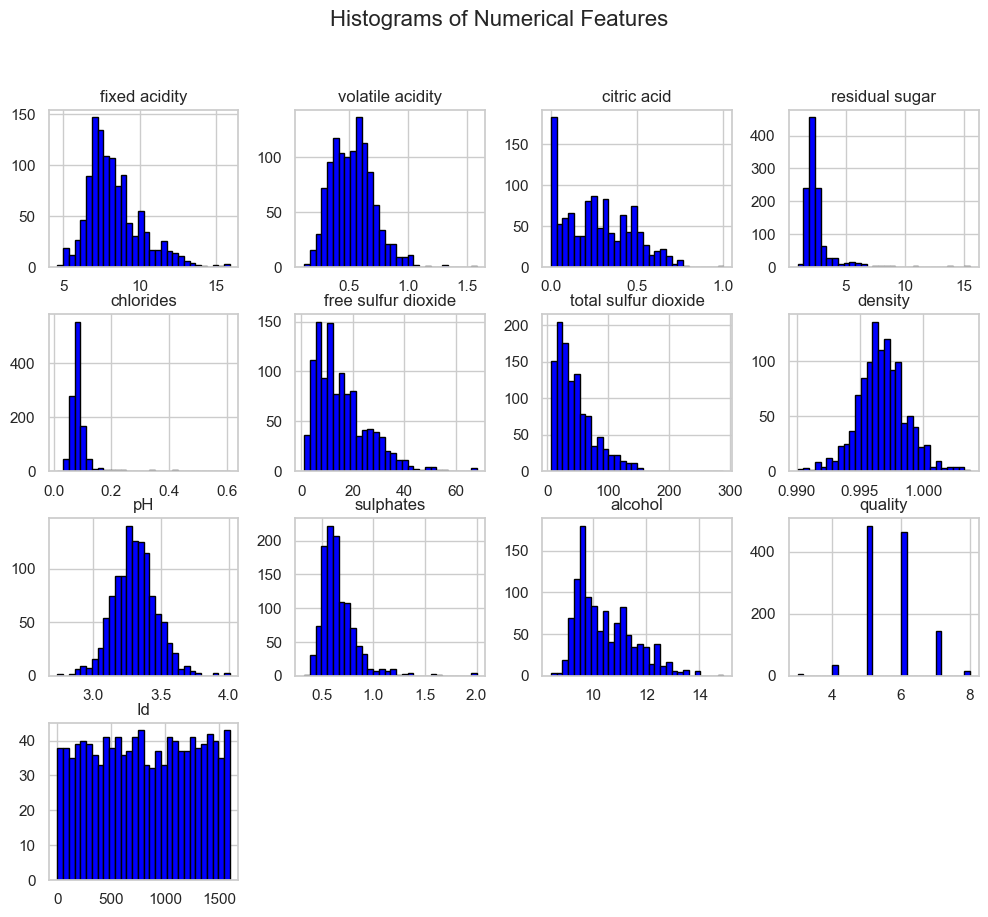

In [24]:
df.hist(bins=30, figsize=(12,10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

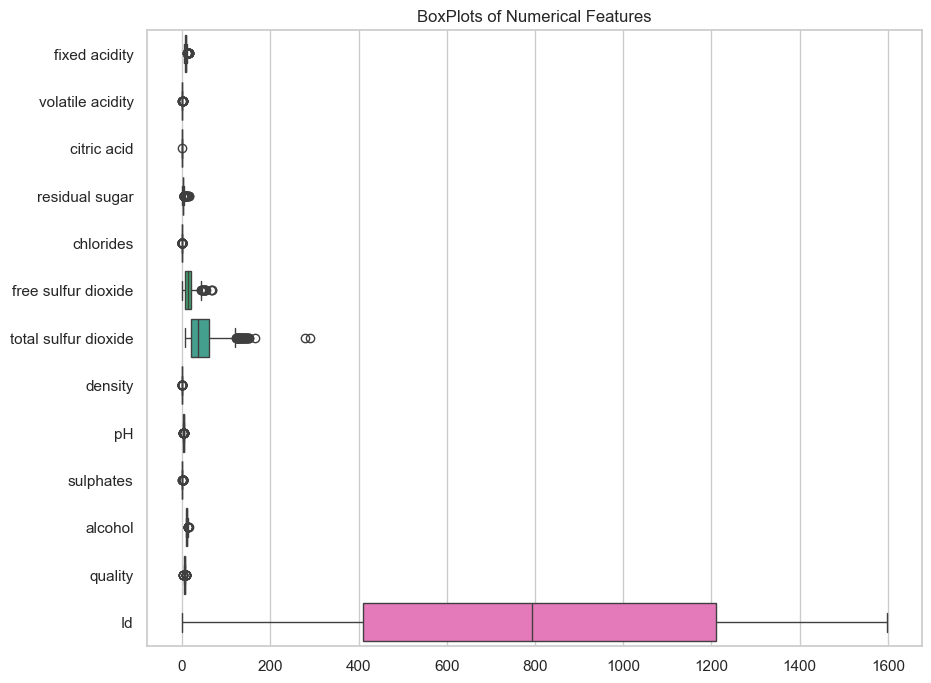

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h')
plt.title('BoxPlots of Numerical Features')
plt.show()

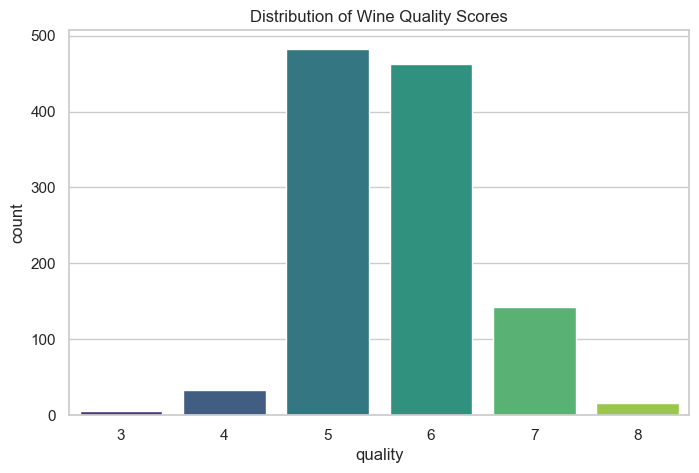

In [35]:
# Step 4.3: Countplot for the target variable 'quality'

sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Distribution of Wine Quality Scores")
plt.show()


### Interpretation of Univariate Analysis

- **Histograms** reveal the shape of the distribution (normal, skewed, long tails, uniform).
- **Boxplots** help detect strong outliers.
- The **quality** column is imbalanced (most wines are rated 5 or 6).
- Features such as *residual sugar*, *chlorides*, and *sulphates* often show skewness and long tails.
- This suggests that data scaling or transformation may be helpful before modeling.


## Step 5 — Bivariate Analysis

In this step, we analyze relationships between pairs of variables.  
This helps us understand:

- Which variables are correlated  
- Which features may influence the target (quality)  
- Which pairs show linear or non-linear relationships  

We will use scatter plots, correlation matrices, and heatmaps.


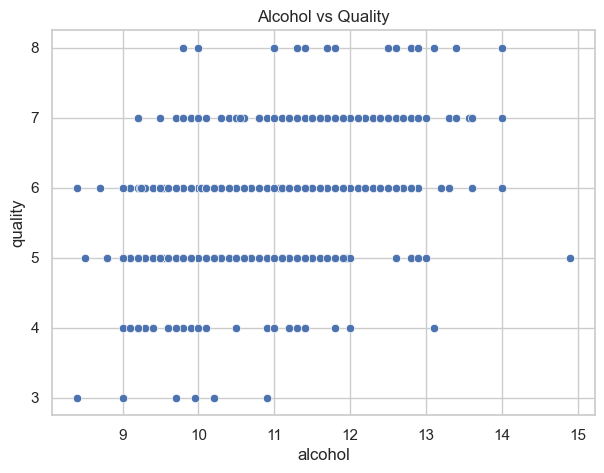

In [36]:
# Scatter plot: alcohol vs quality

plt.figure(figsize=(7, 5))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title("Alcohol vs Quality")
plt.show()


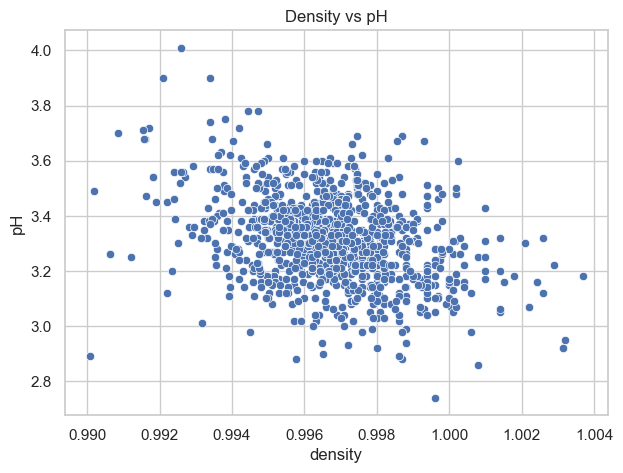

In [37]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='density', y='pH', data=df)
plt.title("Density vs pH")
plt.show()


In [38]:
corr = df.corr()
corr


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


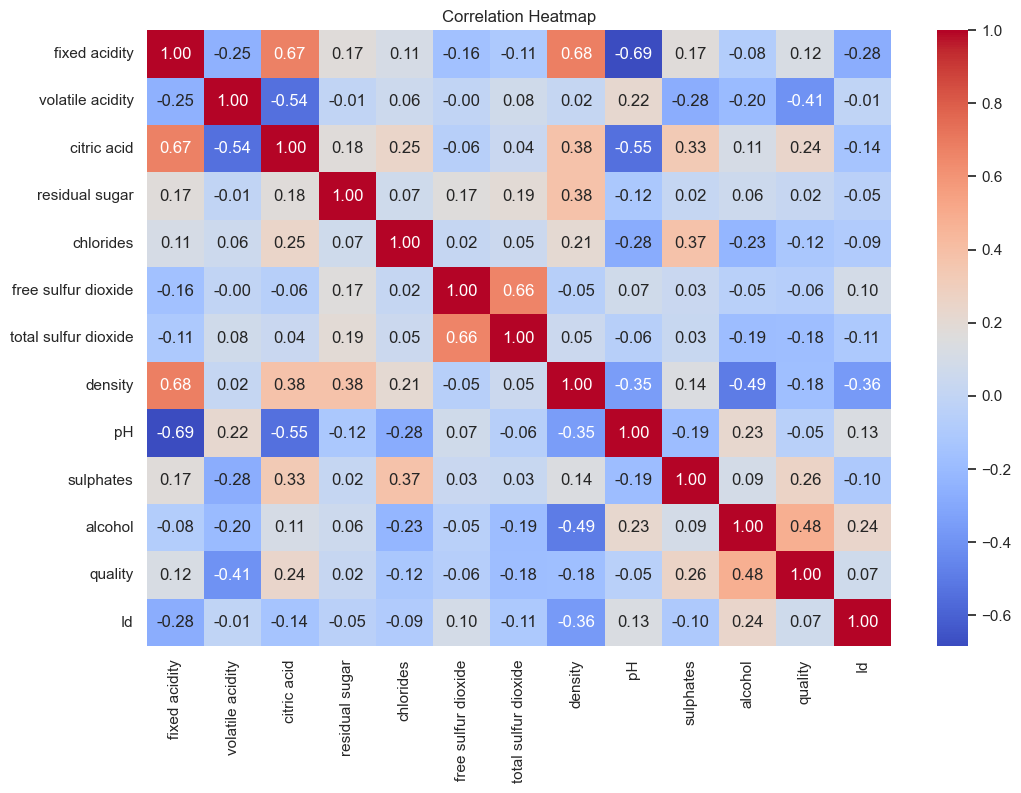

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


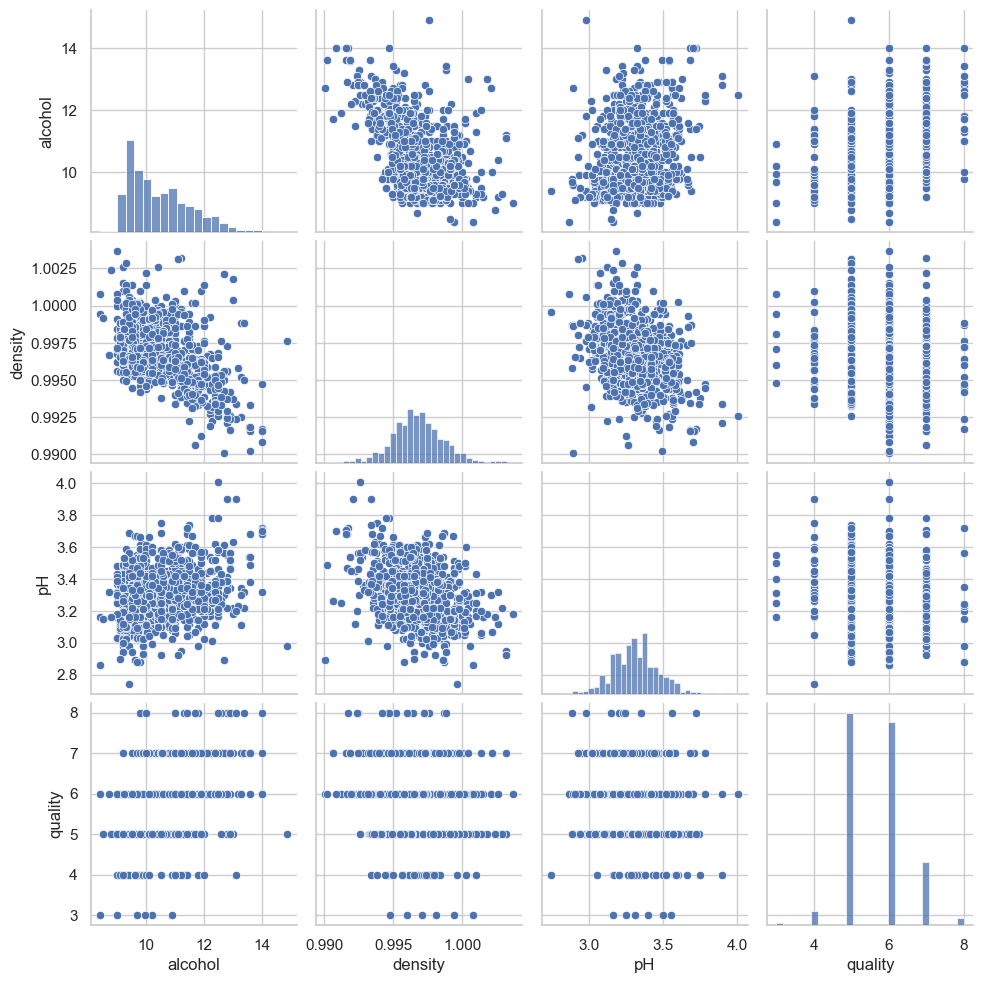

In [40]:
sns.pairplot(df[['alcohol', 'density', 'pH', 'quality']])
plt.show()


### Interpretation of Bivariate Analysis

- **Scatter plots** reveal linear or non-linear patterns between pairs of variables.
- The **correlation heatmap** highlights which variables are most related.
- Alcohol typically shows a **positive correlation** with quality, 
  meaning wines with higher alcohol content tend to receive higher quality ratings.
- Volatile acidity usually shows a **negative correlation** with quality.
- Density is strongly related to alcohol and residual sugar.

These relationships are important for building predictive models later.


## Step 6 — Multivariate Analysis

Multivariate analysis examines the relationship among three or more variables simultaneously. 
This helps us discover deeper patterns that may not appear in univariate or bivariate analysis.

In this step, we use:
- Pairplots to visualize multiple relationships at once,
- Boxplots grouped by categories,
- Multivariate scatter plots using color (hue) to represent a third variable.


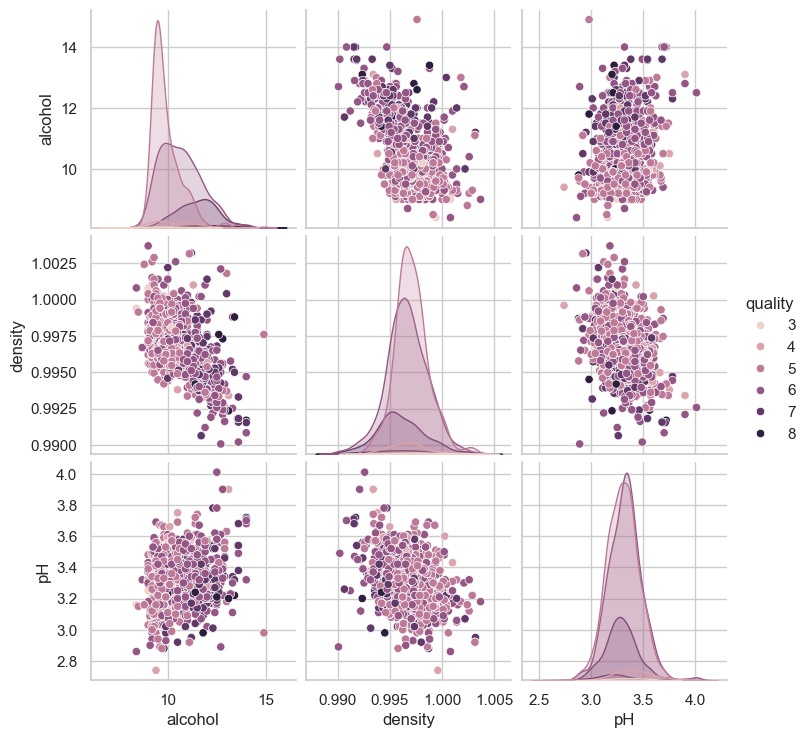

In [42]:
sns.pairplot(df[['alcohol', 'density', 'pH', 'quality']], hue='quality')
plt.show()


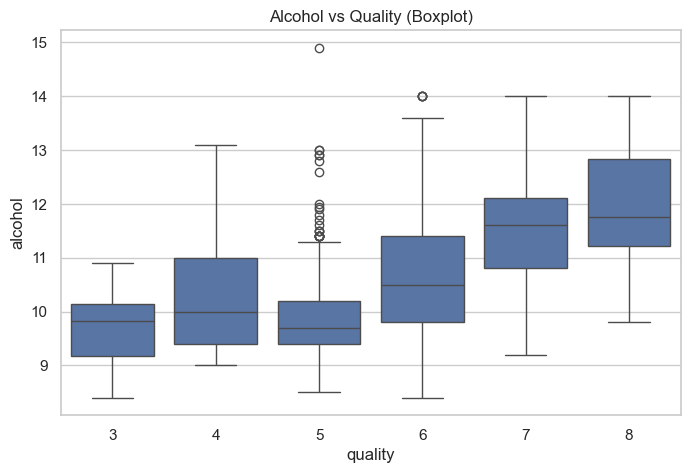

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol vs Quality (Boxplot)")
plt.show()


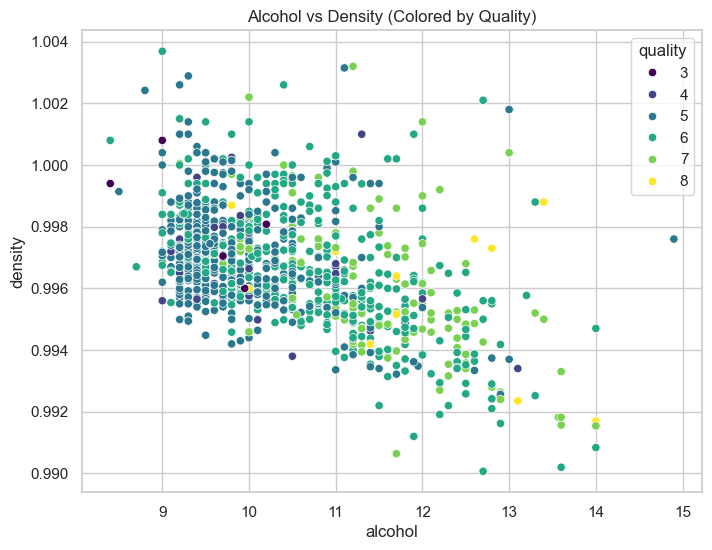

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='alcohol', 
    y='density', 
    hue='quality',
    palette='viridis',
    data=df
)
plt.title("Alcohol vs Density (Colored by Quality)")
plt.show()


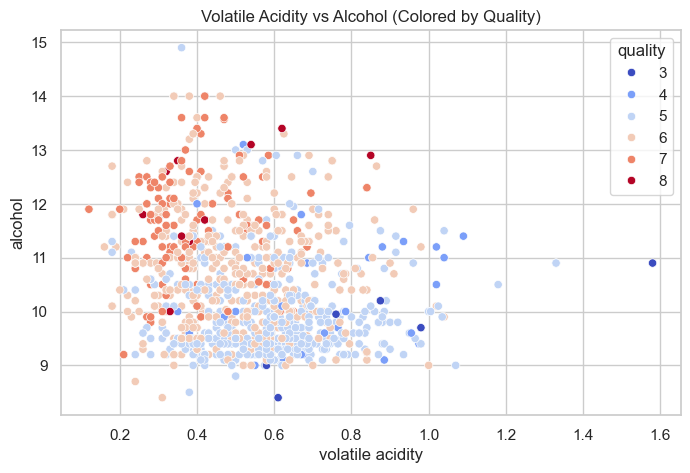

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='volatile acidity', 
    y='alcohol', 
    hue='quality',
    palette='coolwarm',
    data=df
)
plt.title("Volatile Acidity vs Alcohol (Colored by Quality)")
plt.show()


### Interpretation of Multivariate Analysis

- Pairplots reveal how groups (quality levels) cluster across different feature combinations.
- Boxplots grouped by quality show how chemical properties change with quality.
- Using color (hue) as a third variable helps highlight patterns such as:
  - High-quality wines tend to have higher alcohol and lower density.
  - Low-quality wines often have higher volatile acidity.
- Multivariate plots help identify potential predictors and combinations of features important for modeling.


## Step 7 — Handling Outliers

Outliers are data points that lie far outside the normal range of a feature.  
They may represent unusual measurements, errors, or rare events.  
Outliers can distort statistical summaries and negatively affect machine learning models.

In this step, we detect outliers using:
- Boxplots
- Z-score method
- Interquartile Range (IQR) method


In [47]:
# Detect outliers using IQR method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()


fixed acidity            44
volatile acidity         14
citric acid               1
residual sugar          110
chlorides                77
free sulfur dioxide      18
total sulfur dioxide     40
density                  36
pH                       20
sulphates                43
alcohol                  12
quality                  22
Id                        0
dtype: int64

In [ ]:
#df_no_outliers = df[~outliers.any(axis=1)]
#df_no_outliers.shape


### Interpretation of Outlier Detection

- Features such as `residual sugar`, `chlorides`, `sulphates`, and `volatile acidity`
  usually contain the highest number of outliers.
- Outliers may be real measurements (not errors), especially in chemical datasets.
- We typically avoid removing outliers automatically unless they clearly represent noise
  or measurement errors.
- Instead of removal, it is often better to:
  - Apply scaling (StandardScaler)
  - Apply transformations (log, sqrt)
  - Use robust models less sensitive to outliers


## Step 8 — Data Transformation

Data transformation helps reduce skewness, handle outliers, and make features more suitable for modeling.  
In the Wine Quality dataset, some variables such as `residual sugar`, `chlorides`, and `sulphates` show strong right skew.

We apply transformations such as:
- Log Transformation
- Square Root Transformation
- Standard Scaling (Normalization)


In [ ]:
df.skew()
#  Features with skew > 1 are highly skewed.

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
Id                     -0.010419
dtype: float64

In [50]:
df['residual_sugar_log'] = np.log1p(df['residual sugar'])  # log(1 + x)


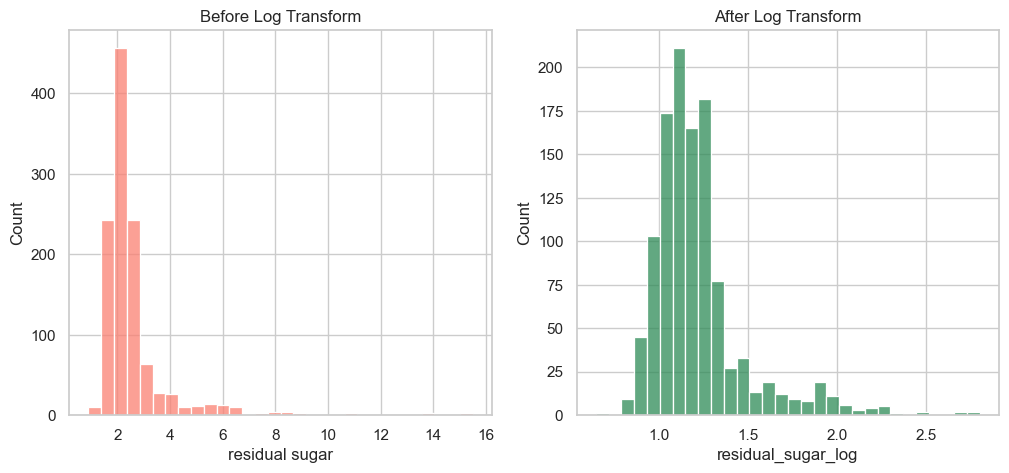

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['residual sugar'], bins=30, ax=ax[0], color='salmon')
ax[0].set_title("Before Log Transform")

sns.histplot(df['residual_sugar_log'], bins=30, ax=ax[1], color='seagreen')
ax[1].set_title("After Log Transform")

plt.show()


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=np.number))

scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=np.number).columns)
scaled_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,residual_sugar_log
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.735618,-0.575154
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-0.815724,-1.733462,0.236097
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-0.815724,-1.731306,-0.090362
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,0.425784,-1.729150,-0.575154
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-0.815724,-1.726993,-0.575154


### Interpretation of Data Transformation

- `residual sugar` was highly skewed and contained many extreme values.
- Applying a log transform made its distribution more symmetric and reduced the impact of outliers.
- Standard scaling helps normalize all features so that models do not get biased toward variables with larger ranges.
- These transformations make the dataset cleaner and improve the performance of downstream machine learning algorithms.
